<a href="https://colab.research.google.com/github/as2092/GA-DataAnalysis/blob/master/GA_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [2]:
# download the data in csv format from github
!wget https://github.com/as2092/GA-DataAnalysis/raw/master/data/KEY_SKU.csv
!wget https://github.com/as2092/GA-DataAnalysis/raw/master/data/Marketing_Spend.csv
!wget https://github.com/as2092/GA-DataAnalysis/blob/master/data/Online.csv?raw=true -O Online.csv
!wget https://github.com/as2092/GA-DataAnalysis/blob/master/data/Retail.csv?raw=true -O Retail.csv

--2020-03-16 20:37:48--  https://github.com/as2092/GA-DataAnalysis/raw/master/data/KEY_SKU.csv
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/as2092/GA-DataAnalysis/master/data/KEY_SKU.csv [following]
--2020-03-16 20:37:48--  https://raw.githubusercontent.com/as2092/GA-DataAnalysis/master/data/KEY_SKU.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25938 (25K) [text/plain]
Saving to: ‘KEY_SKU.csv’

KEY_SKU.csv         100%[===================>]  25.33K  --.-KB/s    in 0.01s   

2020-03-16 20:37:48 (2.10 MB/s) - ‘KEY_SKU.csv’ saved [25938/25938]

--2020-03-16 20:37:50--  https://github.com/as

In [0]:
#Connect to Sqlite
import sqlite3

conn = sqlite3.connect("GA_data.db")
cur = conn.cursor()


In [0]:
# create tables for each CSV

cur.execute('''CREATE TABLE key_sku
             ([product_sku] text PRIMARY KEY, [StockCode] integer)''') # Be Careful about Data Types

cur.execute('''CREATE TABLE marketing_spend
             ([date] date PRIMARY KEY, [Offline_Spend] real, [Online_Spend] real)''')

cur.execute('''CREATE TABLE online
             ([Transaction_ID] text, [Date] date, [product_sku] text,
             [Product] text, [Product_Category] text,
             [Quantity] integer, [Avg_Price] real, [Revenue] real, [Tax] real, [Delivery] real,
             PRIMARY KEY (Transaction_ID, Date, product_sku))
             ''')

cur.execute('''CREATE TABLE retail
             ([InvoiceNo] integer, [InvoiceDate] date,
             [StockCode] integer, [Quantity] integer, PRIMARY KEY (InvoiceNo, InvoiceDate, StockCode))
             ''')

conn.commit()



In [0]:
# insert values from csv files to tables using python pandas library

key_sku_df = pd.read_csv ('KEY_SKU.csv', names=['product_sku', 'StockCode'], skiprows=[0])  #Read_csv is used to read the contents from csv files
key_sku_df.to_sql('key_sku', conn, if_exists='replace', index = False) #Insert data from CSV to SQL table using pandas library function

marketing_spend_df = pd.read_csv ('Marketing_Spend.csv', names=['date', 'Offline_Spend', 'Online_Spend'], skiprows=[0])   
marketing_spend_df.to_sql('marketing_spend', conn, if_exists='replace', index = False)

online_df = pd.read_csv ('Online.csv', names=['Transaction_ID', 'Date', 'product_sku', 'Product',
                                              'Product_Category', 'Quantity', 'Avg_Price',
                                              'Revenue', 'Tax', 'Delivery'], skiprows=[0])
online_df.to_sql('online', conn, if_exists='replace', index = False)

retail_df = pd.read_csv ('Retail.csv', names=['InvoiceNo', 'InvoiceDate', 'StockCode', 'Quantity'], skiprows=[0])   
retail_df.to_sql('retail', conn, if_exists='replace', index = False)

conn.commit()



In [6]:
#Write SQL query to check datatype of different columns
pd.read_sql("SELECT typeof(Date), * FROM online;", conn).head(2) 

,typeof(Date),Transaction_ID,Date,product_sku,Product,Product_Category,Quantity,Avg_Price,Revenue,Tax,Delivery
0,integer,48497,20171231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.0,34.44,19.99
1,integer,48496,20171231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.0,33.14,6.50


Date is in integer format and we need to change this into String format using SQL functions as we want to perform major operation in SQL otherwise this task could have been done using pandas library in python

In [0]:
# Modifying the Date column from "20170301" to "2017-03-01" format
cur.execute(''' UPDATE online
            SET Date = SUBSTR(Date, 1, 4) || "-" || SUBSTR(Date, 5, 2) || "-" ||SUBSTR(Date, 7, 2);  
''') #Concatenate different fields 
conn.commit()

In [8]:
pd.read_sql("SELECT typeof(Date), * FROM online;", conn).head(2)

,typeof(Date),Transaction_ID,Date,product_sku,Product,Product_Category,Quantity,Avg_Price,Revenue,Tax,Delivery
0,text,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.0,34.44,19.99
1,text,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.0,33.14,6.50


In [9]:
#Check datatype for each column for retail table.
print(pd.read_sql("SELECT typeof(InvoiceNo), typeof(InvoiceDate), typeof(StockCode), typeof(Quantity) FROM retail;", conn).head(2))
pd.read_sql("SELECT * FROM retail;", conn).head(5)

  typeof(InvoiceNo) typeof(InvoiceDate) typeof(StockCode) typeof(Quantity)
0           integer                text           integer          integer
1           integer                text           integer          integer


,InvoiceNo,InvoiceDate,StockCode,Quantity
0,536598,2017-01-01,21421,1
1,536598,2017-01-01,21422,2
2,536598,2017-01-01,22178,26
3,536599,2017-01-01,20749,2
4,536599,2017-01-01,21056,2


Date is in Text format which will do the job for us and other columns look fine


In [10]:
#CHeck datatype for each column of key_sku table
print(pd.read_sql("SELECT typeof(product_sku), typeof(StockCode) FROM key_sku;", conn).head(2))
pd.read_sql("SELECT * FROM key_sku;", conn).head(3)

  typeof(product_sku) typeof(StockCode)
0                text           integer
1                text           integer


,product_sku,StockCode
0,GGOENEBQ079099,21421
1,GGOENEBQ079199,21422
2,GGOENEBQ084699,22178


In [11]:
#Check the datatype of each column of marketing_spend table
print(pd.read_sql("SELECT typeof(date), typeof(Offline_Spend), typeof(Online_Spend) FROM marketing_spend;", conn).head(2))
pd.read_sql("SELECT * FROM marketing_spend;", conn).head(2)

  typeof(date) typeof(Offline_Spend) typeof(Online_Spend)
0         text               integer                 real
1         text               integer                 real


,date,Offline_Spend,Online_Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36


In [12]:
pd.read_sql("SELECT * FROM online LIMIT 5;", conn)

,Transaction_ID,Date,product_sku,Product,Product_Category,Quantity,Avg_Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50


In [13]:
# Finding the duplicates in online table
pd.read_sql("""SELECT Transaction_ID, Date, Revenue, COUNT(*)
                FROM online
                GROUP BY 1, 2, 3
                HAVING COUNT(*) > 1;""", conn)

,Transaction_ID,Date,Revenue,COUNT(*)
0,16682,2017-01-01,954.95,13
1,16684,2017-01-01,317.00,2
2,16685,2017-01-01,37.57,3
3,16687,2017-01-01,27.94,6
4,16692,2017-01-01,425.07,5
...,...,...,...,...
10542,48475,2017-12-31,1022.00,3
10543,48477,2017-12-31,337.00,2
10544,48482,2017-12-31,27.20,2
10545,48489,2017-12-31,177.39,3


Looking at the results of above query, I could see some discrepancy in the data. The Revenue column didn't have the correct values , as for same transaction but different products and quantity, the revenue value was same and hence the duplicacy. So I replaced the revenue values by Quantity * Avg_Price

In [0]:
# Handling the duplicates
cur.execute(''' UPDATE online
            SET Revenue = Quantity * Avg_Price;  
''') 
conn.commit()


# Data Analysis
We have 4 tables

*   Online - Online GA data which has daily transactional data at product level
*   Offline - It has daily transactional data at product stock code level but Revenue is missing
*   Key_SKU - This table will act as a bridge between Offline and Online medium to find out the product names for each stock code in offline data and fill the product revenue by taking Avg. Price as a proxy
*   Marketing_Spend - It has daily Online and Offline spends




## Our first task is to aggregate the data using SQL queries

In [15]:
#Test query
#Calculating Number of Orders by day in Offline table - retail
pd.read_sql("SELECT InvoiceDate, COUNT(DISTINCT InvoiceNo) orders FROM retail GROUP BY InvoiceDate;", conn) #pd.read_sql is a function used to read the results from a sql query in Jupyter notebook

,InvoiceDate,orders
0,2017-01-01,113
1,2017-01-02,59
2,2017-01-04,79
3,2017-01-05,92
4,2017-01-06,72
...,...,...
287,2017-12-26,52
288,2017-12-27,88
289,2017-12-28,109
290,2017-12-29,96


In [16]:
#Test query
#Calculating daily Revenue and daily Transactions in Online Table
pd.read_sql("""SELECT Date, COUNT(DISTINCT Transaction_ID) Online_Transactions, SUM(Revenue) Online_Revenue 
              FROM online GROUP BY Date;""", conn)

,Date,Online_Transactions,Online_Revenue
0,2017-01-01,41,7871.07
1,2017-01-02,71,13603.05
2,2017-01-03,127,23953.82
3,2017-01-04,90,17303.35
4,2017-01-05,91,18773.50
...,...,...,...
360,2017-12-27,68,13684.41
361,2017-12-28,52,10994.42
362,2017-12-29,65,12011.27
363,2017-12-30,44,8068.47


In [17]:
# Creating a View to find product revenue in offline data table - retail
#cur.execute is a command in SQLite to execute SQL query. Firstly, we are joining the Online table with key_SKU table using Left join
# to get Stock Code in Online table
# Next, we are calculating the Average Price of each Product SKUs by doing the average of Avg.Price column as price can 
#fluctuate through year and then we are joining the retail table with this dataset using stock code and calculating Offline Revenue 
cur.execute("""CREATE VIEW offline_revenue
               AS
               SELECT r.*, ss.product_sku, round(ss.price, 2) avg_price, round(r.Quantity * ss.price, 2) Revenue
               FROM retail r 
               LEFT JOIN
               (SELECT s.StockCode, s.product_sku, AVG(s.Avg_Price) price 
                           FROM (SELECT o.Date, o.product_sku, o.Avg_Price, k.StockCode
                                 FROM online o
                                 LEFT JOIN key_sku k
                                 ON o.product_sku = k.product_sku) s 
                                 GROUP BY s.StockCode) ss
               ON r.StockCode = ss.StockCode;""")

In [18]:
pd.read_sql("SELECT * FROM offline_revenue ORDER BY avg_price DESC LIMIT 5;", conn)

,InvoiceNo,InvoiceDate,StockCode,Quantity,product_sku,avg_price,Revenue
0,536605,2017-01-01,20966,60,GGOENEBQ092299,351.29,21077.24
1,536876,2017-01-02,20966,1,GGOENEBQ092299,351.29,351.29
2,536975,2017-01-02,20966,1,GGOENEBQ092299,351.29,351.29
3,536982,2017-01-02,20966,1,GGOENEBQ092299,351.29,351.29
4,536984,2017-01-02,20966,1,GGOENEBQ092299,351.29,351.29


In [19]:
#Daily Transactions and Revenue in Offline table
pd.read_sql("""SELECT InvoiceDate, COUNT(DISTINCT InvoiceNo) Offline_Transactions, SUM(Revenue) Offline_Revenue
              FROM offline_revenue 
              GROUP BY InvoiceDate;""", conn)

,InvoiceDate,Offline_Transactions,Offline_Revenue
0,2017-01-01,113,91920.81
1,2017-01-02,59,126132.51
2,2017-01-04,79,128635.96
3,2017-01-05,92,161019.14
4,2017-01-06,72,153433.70
...,...,...,...
287,2017-12-26,52,62229.32
288,2017-12-27,88,117135.27
289,2017-12-28,109,136685.80
290,2017-12-29,96,95782.88


##Creating one View for overall daily data across offline and Online store

We are creating a view so that we can use it later and 

In [20]:
# Creating One View for all Overall metrics to analyze the trend across Online and Offline medium by joining the data from marketing_spend, Online and retail table
# Change Date from String to Date format using strftime method
# Create additional columns of Year, Month, Day, Day of Week, WeekNumber to generate insights on these levels

cur.execute("""CREATE VIEW overall_summary
              AS
                  SELECT 
                  m.date, strftime('%Y', m.date) as "Year",  
                  strftime('%m', m.date) as "Month",
                  strftime('%d', m.date) as "Day", 
                  CASE 
                      WHEN strftime('%w', m.date) = "0" THEN "SUNDAY"
                      WHEN strftime('%w', m.date) = "1" THEN "MONDAY"
                      WHEN strftime('%w', m.date) = "2" THEN "TUESDAY"
                      WHEN strftime('%w', m.date) = "3" THEN "WEDNESDAY"
                      WHEN strftime('%w', m.date) = "4" THEN "THURSDAY"
                      WHEN strftime('%w', m.date) = "5" THEN "FRIDAY"
                      ELSE "SATURDAY"
                  END AS "Day_of_week",
                  strftime('%W', m.date) as "week_of_year",
                  m.Offline_Spend, m.Online_Spend, on_r.Online_Transactions, on_r.Online_Revenue, 
                  IFNULL(of_r.Offline_Transactions, 0) Offline_Transactions, IFNULL(of_r.Offline_Revenue, 0) Offline_Revenue,
                  CAST(on_r.Online_Quantity AS integer) ONLINE_Quantity, IFNULL(of_r.Offline_Quantity, 0) Offline_Quantity
                  FROM marketing_spend m 
                       LEFT JOIN 
                           (SELECT Date, COUNT(DISTINCT Transaction_ID) Online_Transactions, SUM(Revenue) Online_Revenue,
                           SUM(Quantity) Online_Quantity 
                           FROM online 
                           GROUP BY Date) on_r
                       ON m.Date = on_r.Date
                  LEFT JOIN
                      (SELECT InvoiceDate, COUNT(DISTINCT InvoiceNo) Offline_Transactions, SUM(Revenue) Offline_Revenue,
                          SUM(Quantity) Offline_Quantity
                          FROM offline_revenue 
                          GROUP BY InvoiceDate) of_r
                  ON on_r.Date = of_r.InvoiceDate;""")


In [21]:
pd.read_sql("SELECT SUM(Quantity) FROM online", conn)

,SUM(Quantity)
0,245706.0


In [22]:
## Calculate Overall Performance Summary for 2017
pd.read_sql("""SELECT SUM(Online_Revenue) Online_revenue, 
               SUM(Offline_Revenue) Offline_revenue,
               SUM(Offline_Spend) Offline_spend, 
               SUM(Online_Spend) Online_spend,
               SUM(Online_Transactions) Online_Orders,
               SUM(Offline_Transactions) Offline_Orders, 
             (SUM(Offline_Spend)/SUM(Offline_Transactions)) Offline_CPO, 
             (SUM(Online_Spend)/SUM(Online_Transactions)) Online_CPO,
             (SUM(Online_Revenue)/SUM(Online_Transactions)) Online_AOV,
             (SUM(Offline_Revenue)/SUM(Offline_Transactions)) Offline_AOV,
             (SUM(Online_Revenue)+ SUM(Offline_Revenue)) Total_revenue,
               (SUM(Online_Spend) + SUM(Offline_Spend)) Total_spend,
               (SUM(Online_Transactions) + SUM(Offline_Transactions)) Total_orders,
               ((SUM(Online_Revenue) + SUM(Offline_Revenue))/(SUM(Online_Spend) + SUM(Offline_Spend))) ROI,
               ((SUM(Online_Revenue) + SUM(Offline_Revenue))/(SUM(Online_Transactions) + SUM(Offline_Transactions))) Avg_Order_Value,
               ((SUM(Online_Spend) + SUM(Offline_Spend))/(SUM(Online_Transactions) + SUM(Offline_Transactions))) Overall_CPO 
               FROM overall_summary;


             """, conn)

,Online_revenue,Offline_revenue,Offline_spend,Online_spend,Online_Orders,Offline_Orders,Offline_CPO,Online_CPO,Online_AOV,Offline_AOV,Total_revenue,Total_spend,Total_orders,ROI,Avg_Order_Value,Overall_CPO
0,4756028.82,21389740.55,1037900,695646.47,25220,16522,62,27.583127,188.581634,1294.62175,26145769.37,1733546.47,41742,15.082243,626.365995,41.530029


In [23]:
pd.read_sql("SELECT Date, Online_Transactions, Offline_Transactions FROM overall_summary", conn)

,date,Online_Transactions,Offline_Transactions
0,2017-01-01,41,113
1,2017-01-02,71,59
2,2017-01-03,127,0
3,2017-01-04,90,79
4,2017-01-05,91,92
...,...,...,...
360,2017-12-27,68,88
361,2017-12-28,52,109
362,2017-12-29,65,96
363,2017-12-30,44,0


We can see Overall business metrics to evaluate the business. 
We can also check the results breakdown by Offline and Online medium. 


1.   Online Orders are almost 50% more than offline orders however Offline revenue is 50% more than Online - Offline AOV is almost double of Online AOV which suggest that higher value items are generally purchased offline by users
2.   It is much cheaper to get orders online as Cost per order is less than half of offline



#Trends Analysis using SQL

In [24]:
#Calculating monthly revenue and total investments 
df = pd.read_sql("""SELECT Month, (SUM(Online_Revenue)+ SUM(Offline_Revenue)) Total_revenue,
            (SUM(Online_Spend) + SUM(Offline_Spend)) Total_spend
            FROM overall_summary
            GROUP BY MONTH;
""", conn)
df

,Month,Total_revenue,Total_spend
0,01,2222735.59,154928.95
1,02,2157429.83,137107.92
2,03,1646409.37,122250.09
3,04,2293226.66,157026.83
4,05,1781925.07,118259.64
5,06,2049236.16,134318.14
6,07,1905336.80,120217.85
7,08,2042536.00,142904.15
8,09,1855475.70,135514.54
9,10,2166981.26,151224.65


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


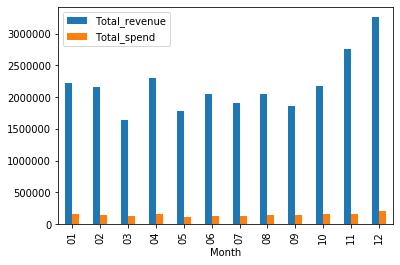

In [25]:
df.set_index("Month", inplace=True)
df[["Total_revenue", "Total_spend"]].plot(kind="bar")

In [25]:
#Compare the Monthly trend of Revenue and Investment by Offline vs Online
pd.read_sql("""SELECT Month, SUM(Online_Revenue), SUM(Offline_Revenue),
            SUM(Online_Spend), SUM(Offline_Spend)
            FROM overall_summary
            GROUP BY MONTH;""", conn)

,Month,SUM(Online_Revenue),SUM(Offline_Revenue),SUM(Online_Spend),SUM(Offline_Spend)
0,01,412216.25,1810519.34,58328.95,96600
1,02,317223.22,1840206.61,55807.92,81300
2,03,364775.38,1281633.99,48750.09,73500
3,04,409670.41,1883556.25,61026.83,96000
4,05,314407.53,1467517.54,52759.64,65500
5,06,333583.54,1715652.62,53818.14,80500
6,07,382811.67,1522525.13,52717.85,67500
7,08,408911.20,1633624.80,57404.15,85500
8,09,365412.09,1490063.61,52514.54,83000
9,10,412290.70,1754690.56,57724.65,93500


In [26]:
# Average order value per month for online and offline 
pd.read_sql("""SELECT Month, (SUM(Online_Revenue)/SUM(Online_Transactions)) Online_AOV,
             (SUM(Offline_Revenue)/SUM(Offline_Transactions)) Offline_AOV
             FROM overall_summary
             GROUP BY Month;""", conn)

,Month,Online_AOV,Offline_AOV
0,01,194.717171,1448.415472
1,02,188.711017,1771.132445
2,03,180.314078,1298.514681
3,04,224.108539,1443.338123
4,05,153.519302,1407.015858
5,06,170.022192,1228.977521
6,07,182.378118,1189.472758
7,08,168.762361,1283.287353
8,09,188.453889,1244.831754
9,10,193.472877,1143.120886


In [27]:
# Offline Transactions and corresponding revenue fo the month of January
pd.read_sql("SELECT Offline_Transactions, Offline_Revenue FROM overall_summary WHERE MONTH = '01'", conn)

,Offline_Transactions,Offline_Revenue
0,113,91920.81
1,59,126132.51
2,0,0.00
3,79,128635.96
4,92,161019.14
5,72,153433.70
6,103,100640.70
7,103,118447.42
8,64,121995.17
9,0,0.00


In [28]:
# weekly trend of no. of orders online and offline
pd.read_sql("""SELECT Week_of_year, 
               SUM(Online_Transactions) Online_Orders,
               SUM(Offline_Transactions) Offline_Orders
               FROM overall_summary
               GROUP BY week_of_year;""", conn)

,week_of_year,Online_Orders,Offline_Orders
0,00,41,113
1,01,519,508
2,02,433,413
3,03,489,216
4,04,443,0
5,05,457,125
6,06,421,255
7,07,469,211
8,08,388,272
9,09,517,331


In [29]:
# Daily trend for no. of orders online and offline
pd.read_sql("""SELECT Day_of_week,
               SUM(Online_Transactions) Online_Orders,
               SUM(Offline_Transactions) Offline_Orders
               FROM overall_summary
               GROUP BY Day_of_week
               ORDER BY Day_of_week
               ;""", conn)

,Day_of_week,Online_Orders,Offline_Orders
0,FRIDAY,3887,2984
1,MONDAY,4413,1655
2,SATURDAY,2143,2943
3,SUNDAY,2323,2976
4,THURSDAY,3901,2740
5,TUESDAY,4300,966
6,WEDNESDAY,4253,2258


In [30]:
pd.read_sql("SELECT SUM(Quantity) FROM offline_revenue", conn)

,SUM(Quantity)
0,826653


In [31]:
#Analysing the impact of other variables on AOV for offline data
pd.read_sql("""SELECT
               strftime('%m', InvoiceDate) as "Month",
               COUNT(DISTINCT(InvoiceNo)) offline_transactions,
               SUM(Quantity) quantity,
               AVG(avg_price) Avg_Price
               FROM offline_revenue
               GROUP BY Month;""", conn)

,Month,offline_transactions,quantity,Avg_Price
0,01,1250,74962,25.346304
1,02,1039,77223,25.176608
2,03,987,50819,26.781042
3,04,1305,65611,27.405272
4,05,1043,56757,27.914755
5,06,1396,62540,26.956217
6,07,1280,59192,25.337833
7,08,1273,64515,25.742362
8,09,1197,55472,26.548097
9,10,1535,66730,26.404829


In [32]:
#Analysing the impact of other variables on AOV for online data
pd.read_sql("""SELECT 
               strftime('%m', Date) as "Month",
               COUNT(DISTINCT(Transaction_ID)) online_orders,
               CAST(SUM(Quantity) AS integer) quantity,
               AVG(Avg_Price) avg_price
               FROM online
               GROUP BY Month;""", conn)

,Month,online_orders,quantity,avg_price
0,01,2117,21194,60.370955
1,02,1681,17206,52.148248
2,03,2023,21731,44.522813
3,04,1828,25964,42.130146
4,05,2048,19369,38.570383
5,06,1962,22425,43.517790
6,07,2099,23716,37.493243
7,08,2423,28632,34.272381
8,09,1939,19834,49.174665
9,10,2131,17711,64.105047


In [33]:
# top 5 product categories by product quantity for online data
pd.read_sql("""SELECT Product_Category,
               SUM(Quantity) quantity
               FROM online
               GROUP BY Product_Category
               ORDER BY quantity DESC LIMIT 5;""", conn)

,Product_Category,quantity
0,Office,88383.0
1,Apparel,32438.0
2,Drinkware,30501.0
3,Lifestyle,24881.0
4,Nest-USA,21430.0


In [34]:
# top 5 product categories by product revenue for online data
pd.read_sql("""SELECT Product_Category,
               SUM(Revenue) revenue
               FROM online
               GROUP BY Product_Category
               ORDER BY revenue DESC LIMIT 5;""", conn)

,Product_Category,revenue
0,Nest-USA,2554202.39
1,Apparel,591145.80
2,Nest,518193.50
3,Office,276794.40
4,Drinkware,200707.83


In [0]:
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [35]:
%%time
# top  product categories by product revenue, quantity for offline data
pd.read_sql("""SELECT o.Product_Category,
               SUM(of_r.Revenue) revenue,
               SUM(of_r.Quantity) quantity
               FROM offline_revenue of_r
               LEFT JOIN (SELECT Distinct(product_sku),
                          Product,
                          Product_Category
                          FROM online) o
               ON of_r.product_sku = o.product_sku
               GROUP BY o.Product_Category
               ;""", conn)

CPU times: user 452 ms, sys: 14.7 ms, total: 467 ms
Wall time: 475 ms


,Product_Category,revenue,quantity
0,None,334650.95,18332
1,Accessories,28945.36,4203
2,Android,27358.39,1837
3,Apparel,14645240.74,617273
4,Backpacks,365071.03,5339
5,Bags,1022984.04,22560
6,Bottles,3170.91,1000
7,Drinkware,218729.21,19447
8,Fun,10308.28,1420
9,Gift Cards,497641.51,3712


In [37]:
# Top product categories for online and offline sales based on revenue
pd.read_sql("""SELECT Product_Category, 
                SUM(revenue) revenue
                FROM
                    (SELECT Product_Category,
                                      SUM(Revenue) revenue, 
                                      SUM(Quantity) quantity
                                      FROM online
                                      GROUP BY Product_Category
                                  UNION
                                  SELECT o.Product_Category,
                                      SUM(of_r.Revenue) revenue,
                                      SUM(of_r.Quantity) quantity
                                      FROM offline_revenue of_r
                                      LEFT JOIN (SELECT Distinct(product_sku),
                                                  Product,
                                                  Product_Category
                                                  FROM online) o
                                      ON of_r.product_sku = o.product_sku
                                      GROUP BY o.Product_Category)
              GROUP BY Product_Category
              ORDER BY revenue DESC LIMIT 5
                  """, conn)

,Product_Category,revenue
0,Apparel,15236386.54
1,Nest-USA,3822461.25
2,Nest,1578724.70
3,Bags,1174298.47
4,Nest-Canada,1149084.49


In [38]:
# Top product categories for online and offline sales based on quantity
pd.read_sql("""SELECT Product_Category, 
                CAST(SUM(quantity) AS integer) quantity
                FROM
                    (SELECT Product_Category,
                                      SUM(Revenue) revenue, 
                                      SUM(Quantity) quantity
                                      FROM online
                                      GROUP BY Product_Category
                                  UNION
                                  SELECT o.Product_Category,
                                      SUM(of_r.Revenue) revenue,
                                      SUM(of_r.Quantity) quantity
                                      FROM offline_revenue of_r
                                      LEFT JOIN (SELECT Distinct(product_sku),
                                                  Product,
                                                  Product_Category
                                                  FROM online) o
                                      ON of_r.product_sku = o.product_sku
                                      GROUP BY o.Product_Category)
              GROUP BY Product_Category
              ORDER BY quantity DESC LIMIT 5
                  """, conn)

,Product_Category,quantity
0,Apparel,649711
1,Office,131128
2,Drinkware,49948
3,Lifestyle,39507
4,Bags,37833


In [0]:
pd.set_option('display.max_rows', None)

In [40]:
# Getting the monthly trend of top product categories by revenue
pd.read_sql("""SELECT strftime('%m', Date) as "Month",
              Product_Category,
              SUM(Revenue) revenue
              FROM online
              GROUP BY 1, 2
              ORDER BY revenue DESC LIMIT 5;""", conn)

,Month,Product_Category,revenue
0,01,Nest-USA,284362.08
1,12,Nest-USA,280190.12
2,11,Nest-USA,263104.00
3,07,Nest-USA,208991.00
4,10,Nest-USA,204951.00


In [41]:
# Getting the monthly trend of top product categories by quantity in online data
pd.read_sql("""SELECT strftime('%m', Date) as "Month",
              Product_Category,
              SUM(Quantity) quantity
              FROM online
              GROUP BY 1, 2
              ORDER BY quantity DESC LIMIT 5;""", conn)

,Month,Product_Category,quantity
0,01,Office,10237.00
1,06,Office,9294.00
2,04,Office,9106.00
3,03,Office,8940.00
4,08,Office,8076.00


In [42]:
#top 5 product categories based on revenue in offline data
pd.read_sql("""SELECT strftime('%m', of_r.InvoiceDate) as "Month",
               o.Product_Category,
               SUM(of_r.Revenue) revenue               
               FROM offline_revenue of_r
               LEFT JOIN (SELECT Distinct(product_sku),
                          Product,
                          Product_Category
                          FROM online) o
               ON of_r.product_sku = o.product_sku
               GROUP BY 1, 2
               ORDER BY 3 DESC LIMIT 5;""", conn)

,Month,Product_Category,revenue
0,12,Apparel,1907229.72
1,11,Apparel,1591307.33
2,02,Apparel,1305595.31
3,01,Apparel,1222855.49
4,04,Apparel,1155458.71


In [80]:
# TOP 10 Products in offline data based on quantity
pd.read_sql("""SELECT 
               o.Product,
               SUM(Quantity) quantity               
               FROM offline_revenue of_r
               LEFT JOIN (SELECT Distinct(product_sku),
                          Product,
                          Product_Category
                          FROM online) o
               ON of_r.product_sku = o.product_sku
               GROUP BY 1
               ORDER BY 2 DESC
               LIMIT 10""", conn)

,Product,quantity
0,Google Braille Tee Black,16394
1,Google Women's Tee Grey,11159
2,Android Tone Hoodie Black,9861
3,Google Zip Hoodie Black,9606
4,Android BTTF Moonshot Graphic Tee,9381
5,Google Women's Lightweight Microfleece Jacket,8770
6,Google Women's Short Sleeve Badge Tee Grey,8756
7,Google Women's Performance Golf Polo Blue,8010
8,Google Protector Tee Navy,7946
9,Google Tee Blue,7334


In [81]:
# TOP 10 Products in offline data based on revenue
pd.read_sql("""SELECT 
               o.Product,
               SUM(Revenue) revenue               
               FROM offline_revenue of_r
               LEFT JOIN (SELECT Distinct(product_sku),
                          Product,
                          Product_Category
                          FROM online) o
               ON of_r.product_sku = o.product_sku
               GROUP BY 1
               ORDER BY 2 DESC
               LIMIT 10""", conn)

,Product,revenue
0,Nest® Learning Thermostat 3rd Gen-USA - White,617280.82
1,Android Tone Hoodie Black,535697.41
2,Google Zip Hoodie Black,518998.21
3,Google Women's 1/4 Zip Jacket Charcoal,444360.37
4,Gift Card - $250.00,436687.45
5,Google Rolltop Backpack Blue,435829.95
6,Nest® Learning Thermostat 3rd Gen - CA - Stain...,427871.81
7,Google Women's Lightweight Microfleece Jacket,421433.17
8,Nest® Cam IQ - USA,392837.21
9,Google Men's Convertible Vest-Jacket Pewter,344381.04


In [43]:
# Top Product in offline data
pd.read_sql("SELECT product_sku, SUM(Revenue), SUM(Quantity) FROM offline_revenue GROUP BY product_sku", conn)

,product_sku,SUM(Revenue),SUM(Quantity)
0,GGOEA0CH077599,47940.24,3596
1,GGOEAAAB034813,1711.04,123
2,GGOEAAAB034814,41673.95,3424
3,GGOEAAAB034815,14177.17,795
4,GGOEAAAB034816,7599.64,453
5,GGOEAAAB034817,15428.24,933
6,GGOEAAAB034913,26056.60,1539
7,GGOEAAAB034914,4783.61,273
8,GGOEAAAB034915,101330.16,6025
9,GGOEAAAB034916,3756.24,216


# Forecasting monthly online sales(no of orders) using Prophet

*   It will serve as a benchmark for next year which we can use as the business as usual level if nothing changes in our strategy
*   It can be used find the incremental effect of new action


*   It can be used as a planning tool to plan demand and supply






In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

# Preparing the data
Online sales dataset has daily Transactions data for the year 2017.<br>
The dataset has columns as shown below.

In [45]:
pd.read_sql("SELECT * FROM online", conn).head(2)

,Transaction_ID,Date,product_sku,Product,Product_Category,Quantity,Avg_Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.00,80.52,322.08,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.00,80.52,402.60,33.14,6.50


For timeseries modeling using Prophet , we'll be using two columns from the dataset(Date and no. of orders)

In [46]:
# fetching data into a dataframe which includes no. of online orders for the year 2017
df = pd.read_sql("""SELECT o.Date,
               COUNT(DISTINCT(o.Transaction_ID)) no_of_orders, 
               ms.online_spend
               FROM online o LEFT JOIN marketing_spend ms
               ON o.Date = ms.date
               GROUP BY 1;""", conn)
df.head()

,Date,no_of_orders,Online_Spend
0,2017-01-01,41,2424.50
1,2017-01-02,71,3480.36
2,2017-01-03,127,1576.38
3,2017-01-04,90,2928.55
4,2017-01-05,91,4055.30


In [47]:
np.sum(df['no_of_orders'])

25220

In [48]:
df.tail()

,Date,no_of_orders,Online_Spend
360,2017-12-27,68,3396.87
361,2017-12-28,52,3246.84
362,2017-12-29,65,2546.58
363,2017-12-30,44,674.31
364,2017-12-31,45,2058.75


Handling Outliers:


*   Converting outliers to Null values and finally dropping those rows


In [0]:
def outliers_to_na(df, devs):
  """
  Converting outliers to none
  """
  median= df['no_of_orders'].median()
  std = np.std(df['no_of_orders'])
  for x in range(len(df)):
      val = df['no_of_orders'][x]
      if (val < median - devs * std or val > median + devs * std):
          df['no_of_orders'][x] = None
  return df

In [0]:
df = outliers_to_na(df, 2)

In [53]:
# check if there is any NAN value
df.isnull().sum()

Date            0
no_of_orders    9
Online_Spend    0
dtype: int64

In [0]:
# drop the outliers
df.dropna(inplace=True)

In [55]:
df.dtypes

Date             object
no_of_orders    float64
Online_Spend    float64
dtype: object

In [0]:
# set date  as the index for dataframe
df = df.set_index('Date')

In [0]:
# converting datatype of date column to date
df.index = pd.to_datetime(df.index)



In [58]:
df.head()

,no_of_orders,Online_Spend
Date,,
2017-01-01,41.00,2424.50
2017-01-02,71.00,3480.36
2017-01-04,90.00,2928.55
2017-01-05,91.00,4055.30
2017-01-06,69.00,3796.85


# Exploratory Data Analysis
Lets draw a timeseries plot for the data to know about seasonlity or abnormal deviations.

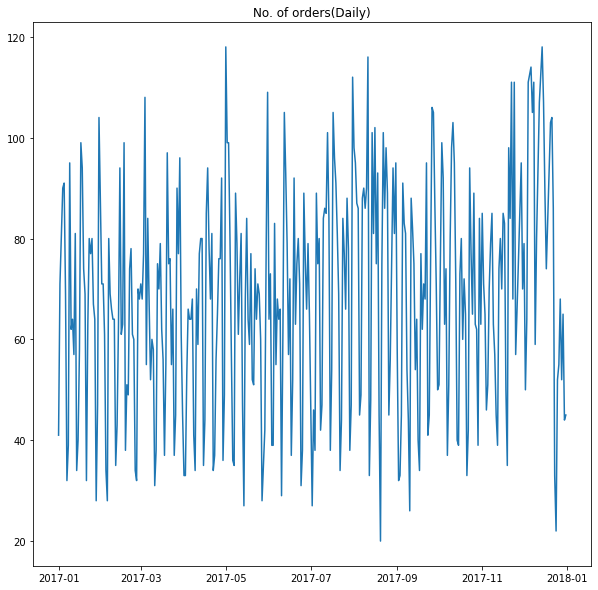

In [59]:
def create_plot(df, title):
  """
  shows plot for a given dataframe
  """
  plt.figure(figsize=(10, 10))
  plt.plot(df["no_of_orders"])
  # plt.xlabel("date")
  # plt.ylabel("no of orders")
  plt.title(title)
  plt.show()

create_plot(df, "No. of orders(Daily)")

In [0]:
# creating a dataframe that gives weekly orders
weekly_df = df.resample('W').apply(sum)

In [61]:
weekly_df.head()

,no_of_orders,Online_Spend
Date,,
2017-01-01,41.00,2424.50
2017-01-08,392.00,19391.96
2017-01-15,433.00,14101.72
2017-01-22,489.00,11975.57
2017-01-29,443.00,6496.82


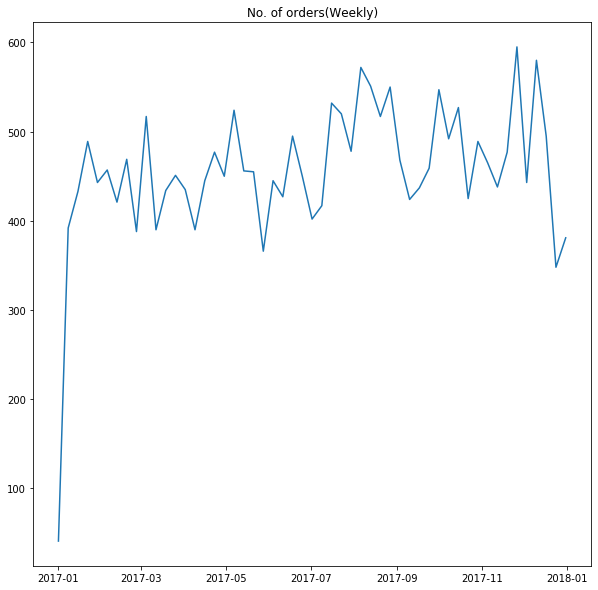

In [62]:
# plot weekly orders
create_plot(weekly_df, "No. of orders(Weekly)")


# Forecasting
Using Prophet's API for creating a forecasting model<br>
Steps:

*   Create a model
*   Call the method fit()


*   Make a forecast
<br>








In [0]:
# import the library
from fbprophet import Prophet

fit method in Prophet requires a dataframe with two columns:

*  ds (datestamp) must be of type date or datetime. 
    
*   y is the target variable(numeric value)



In [64]:
# converting dataframe to the required format
df = df.reset_index()
df = df[['Date', 'no_of_orders']]
df.columns = ['ds', 'y']
df.head()



,ds,y
0,2017-01-01,41.00
1,2017-01-02,71.00
2,2017-01-04,90.00
3,2017-01-05,91.00
4,2017-01-06,69.00


Splitting the dataset into training and testing.<br>
Considering last month data as the prediction target and rest of the months as historical data.

In [65]:
train_df = df[:-31]  #31 for last month
train_df.tail()

,ds,y
320,2017-11-20,98.00
321,2017-11-21,84.00
322,2017-11-22,111.00
323,2017-11-23,68.00
324,2017-11-24,111.00


Box-Cox Transformation:<br>
This is a data transformation that can be used to stabilize variance.

In [0]:
train_df['y'], lambda_prophet = stats.boxcox(train_df['y'])
train_df.reset_index(inplace=True)

In [0]:
df.reset_index(inplace=True)

In [0]:
# create prophet object
m = Prophet()
# adding US holidays data
m.add_country_holidays(country_name='US')
#m.add_regressor('Online_Spend')

# fitting the model over the historical data
m.fit(train_df);


In [0]:
# create a dataframe with historical as well as future dates
future = m.make_future_dataframe(periods=31)

In [72]:
# fetching different predicted values into a dataframe
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day_lower","Martin Luther King, Jr. Day_upper",Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
351,2017-12-21,54.90,48.25,71.60,54.90,54.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.48,4.48,4.48,0.00,0.00,0.00,4.48,4.48,4.48,0.00,0.00,0.00,59.38
352,2017-12-22,54.92,48.33,70.11,54.92,54.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.41,4.41,4.41,0.00,0.00,0.00,4.41,4.41,4.41,0.00,0.00,0.00,59.34
353,2017-12-23,54.94,23.52,46.21,54.94,54.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-19.88,-19.88,-19.88,0.00,0.00,0.00,-19.88,-19.88,-19.88,0.00,0.00,0.00,35.07
354,2017-12-24,54.96,25.49,48.36,54.96,54.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.99,-17.99,-17.99,0.00,0.00,0.00,-17.99,-17.99,-17.99,0.00,0.00,0.00,36.98
355,2017-12-25,54.99,54.66,77.30,54.98,54.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.89,10.89,10.89,0.00,0.00,0.00,10.89,10.89,10.89,0.00,0.00,0.00,65.87


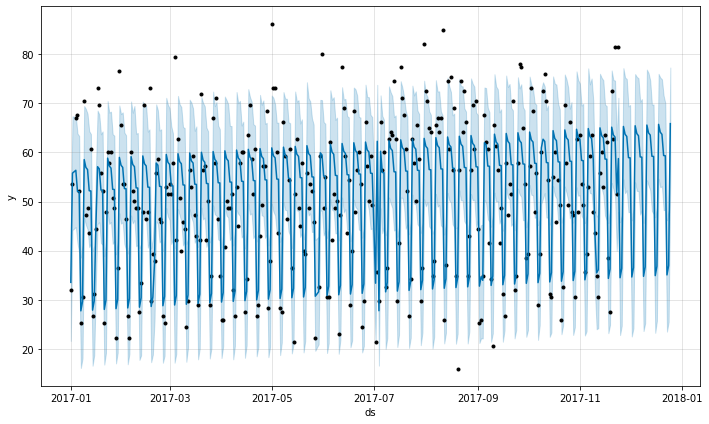

In [73]:
# to visualize forecast values , use prophet's inbuilt plot function
m.plot(forecast);

In above plot:


*   Black dots are the points on which the model is trained
*   Dark blue defines the predictions


*   Light Blue is the Uncertainty interval<br>






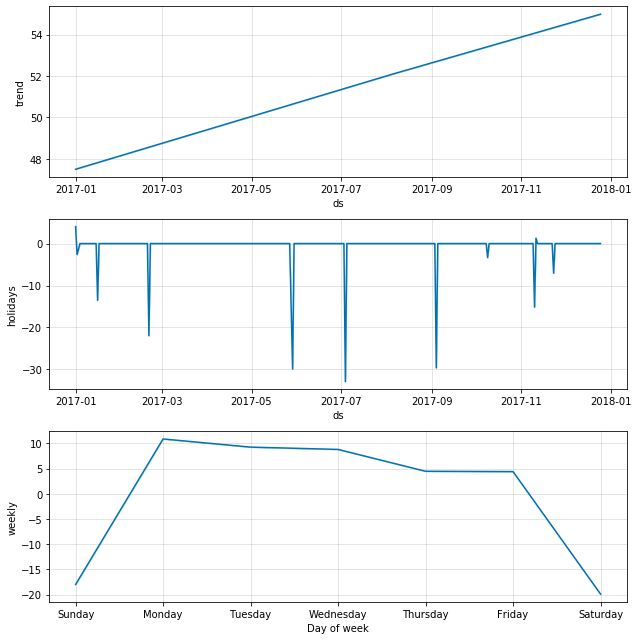

In [74]:
m.plot_components(forecast);

As can be seen in the above plots , no of orders are lower over the weekends and general trend is towards increase on maonthly basis.

In order to get the forcasted values back to the original units ,we need to revert the Box–Cox transformation with our inverse function and the known value of 𝜆


In [0]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)  # using inverse Box-Cox formula

for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast[column] = inverse_boxcox(forecast[column], lambda_prophet)

# Evaluation
Metrics :


*   MAPE (Mean Absolute Percentage Error) 
*   MAE (Mean Absolute Error)



In [76]:
# Creating a dataframe with predicted and actual values
new_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
new_df.tail()

,yhat,yhat_lower,yhat_upper,index,y
ds,,,,,
2017-12-21,79.11,63.41,96.65,345.00,104.00
2017-12-22,79.05,63.52,94.49,346.00,86.00
2017-12-23,45.21,29.74,60.55,347.00,33.00
2017-12-24,47.81,32.35,63.56,348.00,22.00
2017-12-25,88.39,72.41,104.92,349.00,52.00


In [0]:
def calculate_MAPE(df):
  """
  """
  # make a copy
  df = df.copy()
  # calculate percentage error for each preddicted value
  df["percent_error"] = 100 * (df['y'] - df['yhat']) / df['y']
  #get the test data
  predicted_df = df[-31:]

  return np.mean(np.abs(predicted_df["percent_error"]))

def calculate_MAE(df):
  """
  """
  # make a copy
  df = df.copy()
  # calculate error
  df["error"] = df['y'] - df['yhat']
  # get test data
  predicted_df = df[-31:]

  return np.mean(np.abs(predicted_df["error"]))


In [78]:
# calculate error metrics
print("MAPE: ", calculate_MAPE(new_df))
print("MAE: ", calculate_MAE(new_df))

MAPE:  28.608115187480063
MAE:  20.561136511683877


This implies relative error in our predictions is 28.6% and On an average the predicted no. of orders value differs by 20.56 orders from the actual.

# Next Steps:<br>


*   Add more regressors using other features like promotions and considering feature selection
*   Preparing a custom holidays/events calender to improve the holiday effect on the model


*   Fine tuning the model by changing some hyperparameters in Prophet
   




